<a href="https://colab.research.google.com/github/SAMMOSES26/Task6-assingment-5-6-7-/blob/main/Copy_of_Assignment5_6_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [ ]:
ground_cricket_data = {"Chirps": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground_Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

In [ ]:
print(df.shape)
df.head()

(15, 2)


,Chirps,Ground_Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


In [ ]:
df.isnull().sum() 

Chirps                0
Ground_Temperature    0
dtype: int64

In [ ]:
df = df.drop_duplicates() # code to delete duplicates
df.shape

(15, 2)

In [ ]:
df.dtypes 

Chirps                float64
Ground_Temperature    float64
dtype: object

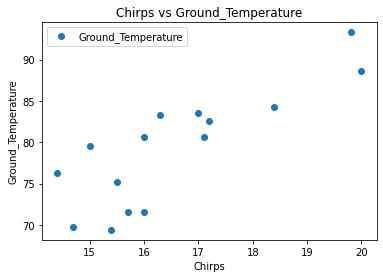

In [ ]:
# we use scaterplot because we have continues data in features and target 
df.plot(x='Chirps', y='Ground_Temperature', style='o') # style='o' means scatterplot
plt.title('Chirps vs Ground_Temperature')
plt.xlabel('Chirps')
plt.ylabel('Ground_Temperature')
plt.show()

In [ ]:
df.corr()

,Chirps,Ground_Temperature
Chirps,1.000000,0.832042
Ground_Temperature,0.832042,1.000000


In [ ]:
df.describe()

,Chirps,Ground_Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


In [ ]:
iqr = df.Chirps.quantile(0.75) - df.Chirps.quantile(0.25) # caluculate the inter quantile range iqr value in this line
upper_threshold = df.Chirps.quantile(0.75) + (1.5 * iqr) # greater than  q3 + 1.5iqr value is outlier
lower_threshold = df.Chirps.quantile(0.25) - (1.5 * iqr) # less than q1 - 1.5iqr  value is outlier
lower_threshold , upper_threshold

(12.9, 19.699999999999996)

In [ ]:
X = df.loc[:, ['Chirps']].values
                                    
y = df.loc[:, 'Ground_Temperature'].values 


from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
X_train.shape, X_test.shape

((10, 1), (5, 1))

In [ ]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()


regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(regressor.intercept_) 

24.595861728699596


In [ ]:
print(regressor.coef_) 

[3.30102686]


In [ ]:
y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions
"Syntax : varName.predict(test_features)"
y_pred

array([85.33475593, 75.76177804, 80.71331833, 73.12095655, 77.41229147])

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,84.3,85.334756
1,75.2,75.761778
2,83.5,80.713318
3,69.7,73.120957
4,80.6,77.412291


In [ ]:
print('R2 score :',regressor.score(X_test,y_test))

R2 score : 0.7949360103662916


In [ ]:
regressor.predict([[18]])

array([84.01434518])

**Extrapolate data**

In [ ]:
iqr = df.Ground_Temperature.quantile(0.75) - df.Ground_Temperature.quantile(0.25) # caluculate the inter quantile range iqr value in this line
upper_threshold = df.Ground_Temperature.quantile(0.75) + (1.5 * iqr) # greater than  q3 + 1.5iqr value is outlier
lower_threshold = df.Ground_Temperature.quantile(0.25) - (1.5 * iqr) # less than q1 - 1.5iqr  value is outlier
lower_threshold , upper_threshold

(58.400000000000006, 98.4)

In [ ]:
X1 = df.loc[:, ['Ground_Temperature']].values
                                    
y1 = df.loc[:, 'Chirps'].values 


from sklearn.model_selection import train_test_split #import the required function
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3)

In [ ]:
X1_train.shape, X1_test.shape

((10, 1), (5, 1))

In [ ]:
from sklearn.linear_model import LinearRegression 
regressor1 = LinearRegression()


regressor1.fit(X1_train, y1_train)

LinearRegression()

In [ ]:
print(regressor1.intercept_) 

1.5136088909515255


In [ ]:
print(regressor1.coef_) 

[0.19507967]


In [ ]:
y1_pred = regressor1.predict(X1_test) # given the features of the test dataset, it will give the final predictions
"Syntax : varName.predict(test_features)"
y1_pred

array([16.28534557, 17.7163051 , 16.95994078, 14.93615515, 15.32455845])

In [ ]:
df1 = pd.DataFrame({'Actual': y1_test, 'Predicted': y1_pred})
df1

,Actual,Predicted
0,14.4,16.285346
1,16.3,17.716305
2,15.0,16.959941
3,14.7,14.936155
4,15.7,15.324558


In [ ]:
print('R2 score :',regressor1.score(X1_test,y1_test))

R2 score : -3.019489745417327


In [ ]:
regressor1.predict([[95]])

array([20.04617775])

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [ ]:
df = pd.read_fwf("brain_body.txt")

In [ ]:
df.shape

(62, 2)

In [ ]:
df.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [ ]:
df.isnull().sum()

Brain    0
Body     0
dtype: int64

In [ ]:
df.dtypes

Brain    float64
Body     float64
dtype: object

In [ ]:
df = df.drop_duplicates() # code to delete duplicates
df.shape

(62, 2)

In [ ]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [ ]:
iqr = df.Brain.quantile(0.75) - df.Brain.quantile(0.25) # calculate the inter quantile range iqr value in this line
upper_threshold = df.Brain.quantile(0.75) + (1.5 * iqr) # greater than  q3 + 1.5iqr value is outlier
lower_threshold = df.Brain.quantile(0.25) - (1.5 * iqr) # less than q1 - 1.5iqr  value is outlier
lower_threshold , upper_threshold

(-70.80375000000001, 119.60625)

**treating outliers**

In [ ]:
df.Brain = df.Brain.clip(-70,119)

In [ ]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,29.078694,283.134194
std,45.015189,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,119.000000,5712.000000


In [ ]:
iqr = df.Body.quantile(0.75) - df.Body.quantile(0.25)  # calculate the inter quantile range iqr value in this line
upper_threshold = df.Body.quantile(0.75) + (1.5 * iqr) # greater than  q3 + 1.5iqr value is outlier
lower_threshold = df.Body.quantile(0.25) - (1.5 * iqr) # less than q1 - 1.5iqr  value is outlier
lower_threshold , upper_threshold

(-238.375, 408.625)

In [ ]:
df.Body = df.Body.clip(-238,408)

In [ ]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,29.078694,104.585806
std,45.015189,148.446708
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,119.000000,408.000000


**EDA**

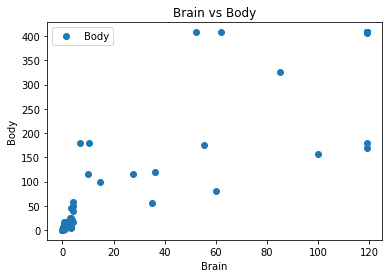

In [ ]:
# we use scaterplot because we have continues data in features and target 
df.plot(x='Brain', y='Body', style='o')  # style='o' means scatterplot
plt.title('Brain vs Body')
plt.xlabel('Brain')
plt.ylabel('Body')
plt.show()

In [ ]:
df.corr()

,Brain,Body
Brain,1.000000,0.888422
Body,0.888422,1.000000


In [ ]:
X = df.loc[:, ['Brain']].values 
                                     
y = df.loc[:, 'Body'].values
                                     
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
y_test

array([4.450e+01, 1.400e-01, 1.150e+02, 2.560e+01, 1.790e+02, 1.320e+03,
       1.700e+01, 5.500e+00, 6.300e+00, 1.550e+01, 1.210e+01, 4.000e-01,
       1.200e+00, 5.040e+01, 5.712e+03, 2.600e+00, 2.400e+00, 1.900e+00,
       6.600e+00])

In [ ]:
X_train.shape, X_test.shape

((46, 1), (16, 1))

In [ ]:
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression() # spredicted score = m * hours + c  

regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(regressor.intercept_) # c

17.624427784483004


In [ ]:
print(regressor.coef_)

[3.18097189]


In [ ]:
y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions"
y_pred

array([ 25.57685752,  31.26443527,  17.69759014, 396.16008319,
        31.09584376,  22.10959816,  17.86300068,  18.51509991,
        17.77711444,  23.98637157,  19.37396233, 183.54392178,
        20.01015671, 396.16008319,  20.12149072,  18.97634084])

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,12.10,25.576858
1,39.20,31.264435
2,0.40,17.697590
3,169.00,396.160083
4,50.40,31.095844
5,17.50,22.109598
6,1.20,17.863001
7,1.90,18.515100
8,0.33,17.777114
9,12.30,23.986372


In [ ]:
regressor.score(X_test,y_test)

0.7217087136759264

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [5]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [6]:
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [7]:
df.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [8]:
df.dtypes

Sex       int64
Rank      int64
Year      int64
Degree    int64
YSdeg     int64
Salary    int64
dtype: object

In [9]:
df=df.drop_duplicates()

In [10]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


In [11]:
iqr=df['Sex'].quantile(0.75) - df['Sex'].quantile(0.25)
upper_threshold=df['Sex'].quantile(0.75) + (1.5 * iqr)
lower_threshold=df['Sex'].quantile(0.25) - (1.5 * iqr)
upper_threshold,lower_threshold

(2.5, -1.5)

In [12]:
iqr=df['Rank'].quantile(0.75) - df['Rank'].quantile(0.25)
upper_threshold=df['Rank'].quantile(0.75) + (1.5 * iqr)
lower_threshold=df['Rank'].quantile(0.25) - (1.5 * iqr)
upper_threshold,lower_threshold

(6.0, -2.0)

In [13]:
iqr=df['Year'].quantile(0.75) - df['Year'].quantile(0.25)
upper_threshold=df['Year'].quantile(0.75) + (1.5 * iqr)
lower_threshold=df['Year'].quantile(0.25) - (1.5 * iqr)
upper_threshold,lower_threshold

(23.0, -9.0)

In [14]:
iqr=df['Degree'].quantile(0.75) - df['Degree'].quantile(0.25)
upper_threshold=df['Degree'].quantile(0.75) + (1.5 * iqr)
lower_threshold=df['Degree'].quantile(0.25) - (1.5 * iqr)
upper_threshold,lower_threshold

(2.5, -1.5)

In [15]:
iqr=df['YSdeg'].quantile(0.75) - df['YSdeg'].quantile(0.25)
upper_threshold=df['YSdeg'].quantile(0.75) + (1.5 * iqr)
lower_threshold=df['YSdeg'].quantile(0.25) - (1.5 * iqr)
upper_threshold,lower_threshold

(48.0, -18.0)

**EDA**

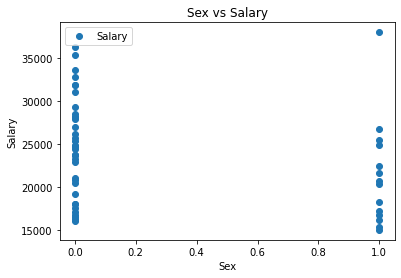

In [32]:
# df.groupby('Sex')['Salary'].mean().plot()
import matplotlib.pyplot as plt
df.plot(x='Sex', y='Salary', style='o')
plt.title('Sex vs Salary')
plt.xlabel('Sex')
plt.ylabel('Salary')
plt.show()

In [20]:
df[['Sex','Salary']].corr()

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


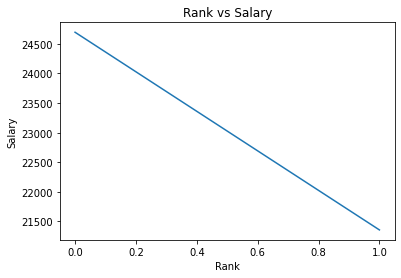

In [30]:
df.groupby('Sex')['Salary'].mean().plot()
#df.plot(x='Rank', y='Salary', style='o')
plt.title('Rank vs Salary')
plt.xlabel('Rank')
plt.ylabel('Salary')
plt.show()

In [23]:
df[['Rank','Salary']].corr()

,Rank,Salary
Rank,1.000000,0.867488
Salary,0.867488,1.000000


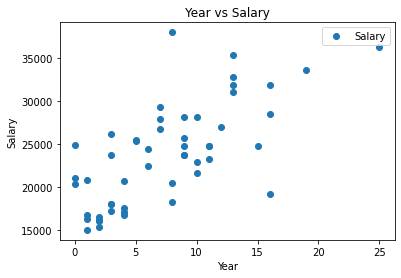

In [24]:
df.plot(x='Year', y='Salary', style='o')
plt.title('Year vs Salary')
plt.xlabel('Year')
plt.ylabel('Salary')
plt.show()

In [25]:
df[['Year','Salary']].corr()

,Year,Salary
Year,1.000000,0.700669
Salary,0.700669,1.000000


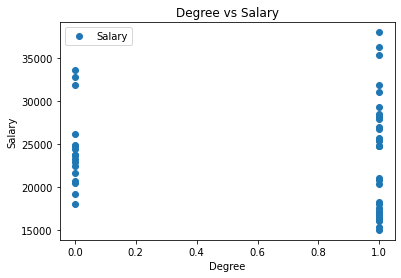

In [26]:
df.plot(x='Degree', y='Salary', style='o')
plt.title('Degree vs Salary')
plt.xlabel('Degree')
plt.ylabel('Salary')
plt.show()

In [27]:
df[['Degree','Salary']].corr()

,Degree,Salary
Degree,1.000000,-0.069726
Salary,-0.069726,1.000000


1) no linear relationship between degree and salary

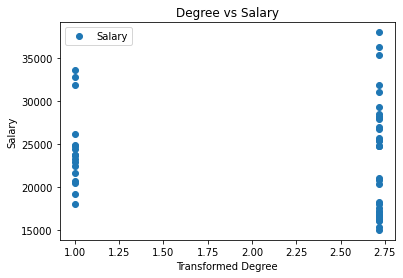

,transformed,Salary
transformed,1.000000,-0.069726
Salary,-0.069726,1.000000


In [34]:
import numpy as np
df['transformed'] = np.exp(df['Degree']) # transformation
df.plot(x='transformed', y='Salary', style='o')
plt.title('Degree vs Salary')
plt.xlabel('Transformed Degree')
plt.ylabel('Salary')
plt.show()
df[['transformed','Salary']].corr()

After transformation also no linear relationship so decided to drop the feature 

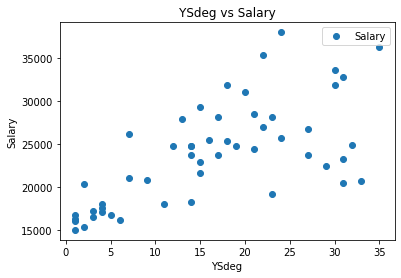

In [28]:
df.plot(x='YSdeg', y='Salary', style='o')
plt.title('YSdeg vs Salary')
plt.xlabel('YSdeg')
plt.ylabel('Salary')
plt.show()

In [29]:
df[['YSdeg','Salary']].corr()

,YSdeg,Salary
YSdeg,1.000000,0.674854
Salary,0.674854,1.000000


In [47]:
X = df[['Sex', 'Rank', 'Year','YSdeg']].values #array of features
y = df['Salary'].values #array of targets

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [49]:
from sklearn.preprocessing import StandardScaler ## standrard scalig 
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train) # we are finding the values of mean and sd from the td
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data

In [50]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [51]:
coeff_df = pd.DataFrame(regressor.coef_,['Sex', 'Rank',
       'Year', 'YSdeg'], columns=['Coefficient'])
y_pred = regressor.predict(X_test_scaled)
coeff_df

,Coefficient
Sex,390.252109
Rank,4398.629811
Year,2276.994918
YSdeg,-546.442669


In [53]:
regressor.predict(scaler.transform(np.array([[1,3,5,2]])))

array([29069.40220732])

In [54]:
regressor.intercept_

23479.634146341465

In [55]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,18304,19477.645545
1,22906,24558.301345
2,23712,23446.374159
3,36350,35366.305618
4,31850,30227.939303
5,20999,20487.413843
6,20300,16529.302360
7,27025,30217.322173
8,26775,28595.046943
9,29342,28347.074931


In [57]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.894314110506466


# **In this analysis we can see  ' Rank column ' has highest correlation comparing to sex column so that we can conclude that comparing to Female and Male , Female is getting more salary than Male**